<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-8:-Problem-Set-4:-Visualizing-Subway-Data" data-toc-modified-id="Lesson-8:-Problem-Set-4:-Visualizing-Subway-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson 8: Problem Set 4: Visualizing Subway Data</a></span><ul class="toc-item"><li><span><a href="#Lesson-8:-Quiz-1:-Visualization-1" data-toc-modified-id="Lesson-8:-Quiz-1:-Visualization-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lesson 8: Quiz 1: Visualization 1</a></span></li><li><span><a href="#Lesson-8:-Quiz-2:-Make-Another--Visualization" data-toc-modified-id="Lesson-8:-Quiz-2:-Make-Another--Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lesson 8: Quiz 2: Make Another  Visualization</a></span></li></ul></li></ul></div>

# Lesson 8: Problem Set 4: Visualizing Subway Data

In [1]:
import dateutil.parser as parser
import matplotlib.pyplot as plt

## Lesson 8: Quiz 1: Visualization 1

Data: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

/Users/poudel/miniconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/poudel/miniconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


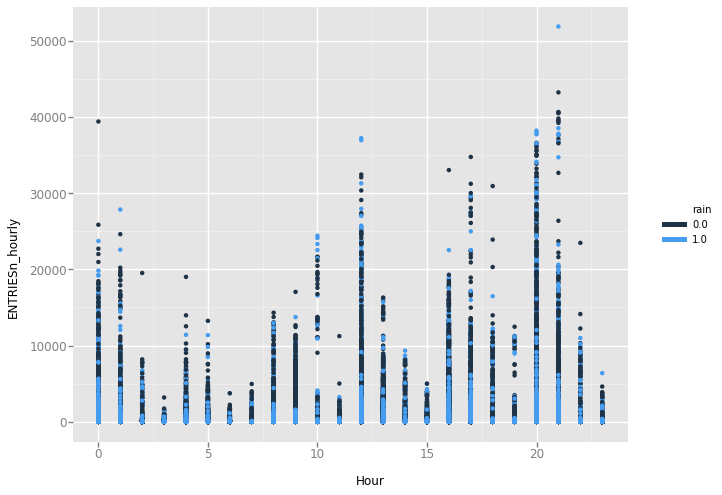

<ggplot: (292590898)>

In [2]:
#%%writefile lesson8_quiz1_visualization1.py
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(turnstile_weather, aes("Hour", "ENTRIESn_hourly", color="rain")) + geom_point()
    return plot

# Usage
turnstile_weather_csv = "../data/turnstile_data_master_with_weather.csv" 
turnstile_weather = pandas.read_csv(turnstile_weather_csv)
plot_weather_data(turnstile_weather)

Utility Functions

In [3]:
import dateutil.parser as parser
def  getYear(date):
    return parser.parse(date).year

def getMonth(date):
    return parser.parse(date).month

def getDay(date):
    return parser.parse(date).day

def getHour(time):
    return time.split(':')[0]

def getMinute(time):
    return time.split(':')[1]

In [4]:
def plot_weather_data(turnstile_weather):

    # Algorithm that will create new date columns 
    turnstile_weather["Year"] = turnstile_weather["DATEn"].apply(getYear)
    
    # Get specific data
    ds = turnstile_weather[turnstile_weather['Year'] == 2011][['UNIT', 'ENTRIESn_hourly']]\
    .groupby(['UNIT'])\
    .sum()\
    .reset_index()\
    .sort_values(['ENTRIESn_hourly'], ascending=[False])[0:5]
    
    # Get legends to chart
    legends = []
    for index, row in ds.iterrows():
        legends.append("{}: {}".format(row['UNIT'], int(row['ENTRIESn_hourly'])))
    
    # Configure the pie chart
    plt.pie(ds[['ENTRIESn_hourly']], shadow=True)        
    plt.legend(legends, loc=(-0.3, 0.05), shadow=True)
    plt.title('Units with more entries per hour in 2011 - Pie chart')
    plt.show()

In [5]:
dataset = pandas.read_csv("../data/turnstile_data_master_with_weather.csv")
dataset.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


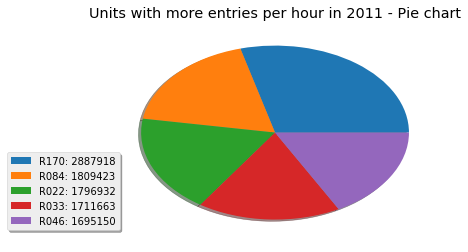

In [6]:
plot_weather_data(dataset)

## Lesson 8: Quiz 2: Make Another  Visualization

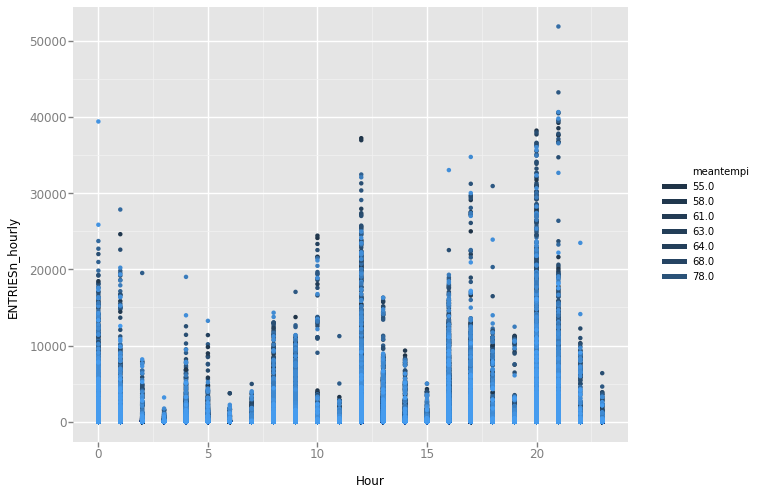

<ggplot: (309318050)>

In [7]:
# %%writefile lesson8_quiz2_make_another_visualization.py
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(turnstile_weather, aes("Hour", "ENTRIESn_hourly", color="meantempi")) + geom_point()
    return plot

# Usage
turnstile_weather_csv = "../data/turnstile_data_master_with_weather.csv" 
turnstile_weather = pandas.read_csv(turnstile_weather_csv)
plot_weather_data(turnstile_weather)